# **ECON 441B: Week 4 In-Class Assignment**
Courtney Manhart

# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ECON441B/Week 3/fraudTest.csv", 
                 index_col = 0, parse_dates = True)

In [4]:
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [5]:
# Convert to date_time
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# Looking at Month to visualize fraud
df['time_var'] = [i.month for i in df['trans_date_trans_time']]

In [6]:
# Simplify Data
X = pd.get_dummies(df[['amt', 'city_pop', 'time_var', 'category']], 
                   ['category'])
y = df['is_fraud']

In [7]:
X.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,6,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,6,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,6,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [9]:
# Setting up training and testing 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.3, random_state=0)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
# Oversample Training Data
print("Before Oversample, counts of label '1':", sum(y_train == 1))
print("Before Oversample, counts of label '0':", sum(y_train == 0))
print('\n')

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 0)
X_over, y_over = ros.fit_resample(X_train, y_train)

print('After Oversample, the shape of train_X:', (X_over.shape))
print('After Oversample, the shape of train_y:', (y_over.shape))
print('\n')

print("After Oversample, counts of label '1': ", (sum(y_over == 1)))
print("After Oversample, counts of label '0': ", (sum(y_over == 0)))

Before Oversample, counts of label '1': 1485
Before Oversample, counts of label '0': 387518


After Oversample, the shape of train_X: (775036, 17)
After Oversample, the shape of train_y: (775036,)


After Oversample, counts of label '1':  387518
After Oversample, counts of label '0':  387518


In [11]:
# Undersample Training Data
print("Before Undersample, counts of label '1':", sum(y_train == 1))
print("Before Undersample, counts of label '0':", sum(y_train == 0))
print('\n')

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 0)
X_under, y_under = rus.fit_resample(X_train, y_train)

print('After Undersample, the shape of train_X:', (X_under.shape))
print('After Undersample, the shape of train_y:', (y_under.shape))
print('\n')

print("After Undersample, counts of label '1': ", (sum(y_under == 1)))
print("After Undersample, counts of label '0': ", (sum(y_under == 0)))

Before Undersample, counts of label '1': 1485
Before Undersample, counts of label '0': 387518


After Undersample, the shape of train_X: (2970, 17)
After Undersample, the shape of train_y: (2970,)


After Undersample, counts of label '1':  1485
After Undersample, counts of label '0':  1485


In [12]:
# SMOTE Training Data
print("Before SMOTE, counts of label '1':", sum(y_train == 1))
print("Before SMOTE, counts of label '0':", sum(y_train == 0))
print('\n')
  
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 0)
X_SMOTE, y_SMOTE = sm.fit_resample(X_train, y_train)
  
print('After SMOTE, the shape of train_X:', (X_SMOTE.shape))
print('After SMOTE, the shape of train_y:', (y_SMOTE.shape))
print('\n')

print("After SMOTE, counts of label '1': ", (sum(y_SMOTE == 1)))
print("After SMOTE, counts of label '0': ", (sum(y_SMOTE == 0)))

Before SMOTE, counts of label '1': 1485
Before SMOTE, counts of label '0': 387518


After SMOTE, the shape of train_X: (775036, 17)
After SMOTE, the shape of train_y: (775036,)


After SMOTE, counts of label '1':  387518
After SMOTE, counts of label '0':  387518


# 3.) Train three logistic regression models 

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
# Train Oversample Logistic Regression Model
log_reg_over = LogisticRegression().fit(X_over, y_over)

In [15]:
# Train Undersample Logistic Regression Model
log_reg_under = LogisticRegression().fit(X_under, y_under)

In [16]:
# Train SMOTE Logistic Regression Model
log_reg_SMOTE = LogisticRegression().fit(X_SMOTE, y_SMOTE)

# 4.) Test the three models

In [17]:
# Test Oversample Logistic Regression Model
y_pred_over = log_reg_over.predict(X_test) 

In [18]:
# Test Undersample Logistic Regression Model
y_pred_under = log_reg_under.predict(X_test) 

In [19]:
# Test SMOTE Logistic Regression Model
y_pred_SMOTE = log_reg_SMOTE.predict(X_test) 

# 5.) Which performed best in Out of Sample metrics?

In [20]:
from sklearn import metrics

Oversample Metrics


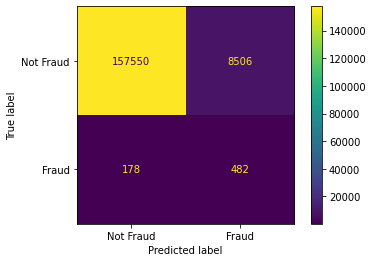

              precision    recall  f1-score   support

           0       1.00      0.95      0.97    166056
           1       0.05      0.73      0.10       660

    accuracy                           0.95    166716
   macro avg       0.53      0.84      0.54    166716
weighted avg       1.00      0.95      0.97    166716



In [21]:
# Oversample
print('Oversample Metrics')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_over)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                    display_labels = ["Not Fraud", "Fraud"])
cm_display.plot()
plt.show()

auc = metrics.classification_report(y_test, y_pred_over)
print(auc)


Undersample Metrics


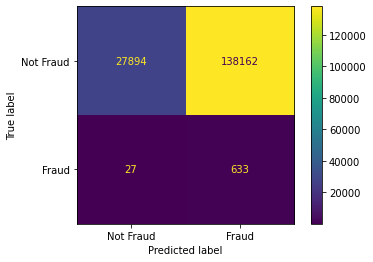

              precision    recall  f1-score   support

           0       1.00      0.17      0.29    166056
           1       0.00      0.96      0.01       660

    accuracy                           0.17    166716
   macro avg       0.50      0.56      0.15    166716
weighted avg       1.00      0.17      0.29    166716



In [22]:
# Undersample
print('Undersample Metrics')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_under)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                    display_labels = ["Not Fraud", "Fraud"])
cm_display.plot()
plt.show()

auc = metrics.classification_report(y_test, y_pred_under)
print(auc)


SMOTE Metrics


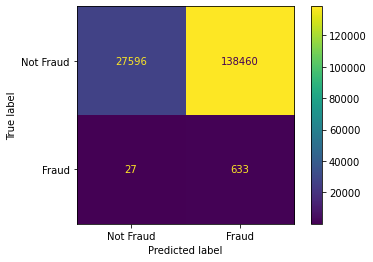

              precision    recall  f1-score   support

           0       1.00      0.17      0.28    166056
           1       0.00      0.96      0.01       660

    accuracy                           0.17    166716
   macro avg       0.50      0.56      0.15    166716
weighted avg       1.00      0.17      0.28    166716



In [23]:
# SMOTE
print('SMOTE Metrics')
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_SMOTE)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, 
                    display_labels = ["Not Fraud", "Fraud"])
cm_display.plot()
plt.show()

auc = metrics.classification_report(y_test, y_pred_SMOTE)
print(auc)


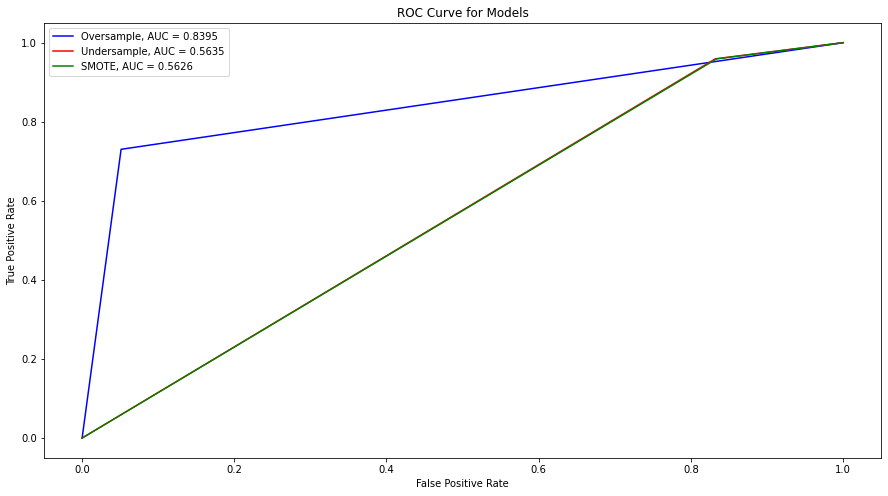

In [24]:
## Plotting ROC Curves to Compare Models 

# Oversample
fpr_over, tpr_over, thresholds_over = metrics.roc_curve(y_test, y_pred_over)
auc_over = metrics.auc(fpr_over, tpr_over)


# Undersample
fpr_under, tpr_under, thresholds_under = metrics.roc_curve(y_test, y_pred_under)
auc_under = metrics.auc(fpr_under, tpr_under)

# SMOTE
fpr_SMOTE, tpr_SMOTE, thresholds_SMOTE = metrics.roc_curve(y_test, y_pred_SMOTE)
auc_SMOTE = metrics.auc(fpr_SMOTE, tpr_SMOTE)


plt.figure(figsize = (15, 8))

plt.plot(fpr_over, tpr_over, color = 'blue', 
         label = 'Oversample, AUC = '+str(round(auc_over, 4)))
plt.plot(fpr_under, tpr_under, color = 'red', 
         label = 'Undersample, AUC = '+str(round(auc_under, 4)))
plt.plot(fpr_SMOTE, tpr_SMOTE, color = 'green', 
         label = 'SMOTE, AUC = '+str(round(auc_SMOTE, 4)))
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Models')


plt.show()

Based on the confusion matricies, accuracy scores, and ROC curves, we can see that the Oversampled model performed best.

# 6.) Pick two features and plot the two classes before and after SMOTE.

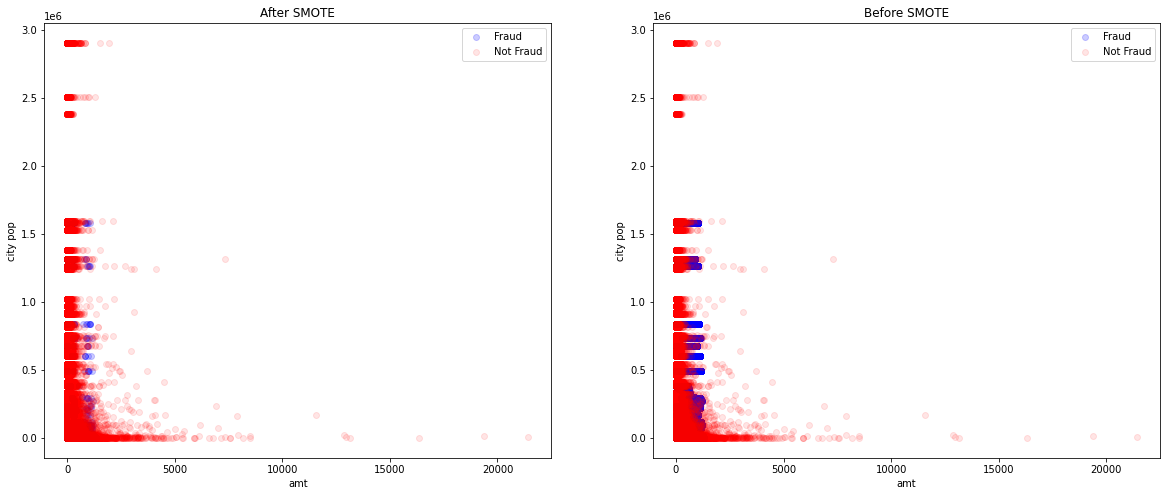

In [25]:
### Picking 2 features 
# Before SMOTE
data = X_train
data['is_fraud'] = y_train

amt_fraud = data['amt'].loc[data['is_fraud'] == 1]
amt_not = data['amt'].loc[data['is_fraud'] == 0]
citypop_fraud = data['city_pop'].loc[data['is_fraud'] == 1]
citypop_not = data['city_pop'].loc[data['is_fraud'] == 0]

# After SMOTE
smote_data = X_SMOTE
smote_data['is_fraud'] = y_SMOTE

smote_amt_fraud = smote_data['amt'].loc[smote_data['is_fraud'] == 1]
smote_amt_not = smote_data['amt'].loc[smote_data['is_fraud'] == 0]
smote_citypop_fraud = smote_data['city_pop'].loc[smote_data['is_fraud'] == 1]
smote_citypop_not = smote_data['city_pop'].loc[smote_data['is_fraud'] == 0]

fig, ax = plt.subplots(1, 2, figsize = (20, 8))

#Before SMOTE
ax[0].scatter(amt_fraud, citypop_fraud, color = 'blue', 
              marker = 'o', alpha = 0.2)
ax[0].scatter(amt_not, citypop_not, color = 'red', 
              marker = 'o', alpha = 0.1)

ax[0].set_xlabel('amt')
ax[0].set_ylabel('city pop')
ax[0].set_title('After SMOTE')
ax[0].legend(['Fraud', 'Not Fraud'])

# After SMOTE
ax[1].scatter(smote_amt_fraud, smote_citypop_fraud, color = 'blue', 
              marker = 'o', alpha = 0.2)
ax[1].scatter(smote_amt_not, smote_citypop_not, color = 'red', 
              marker = 'o', alpha = 0.1)

ax[1].set_xlabel('amt')
ax[1].set_ylabel('city pop')
ax[1].set_title('Before SMOTE')
ax[1].legend(['Fraud', 'Not Fraud'])
plt.show()